In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf

import fingerprint_enhancer

In [2]:
img_path = '../data/cropped/raw/'
fig_path = '../figures/cropped/'
os.makedirs(fig_path, exist_ok=True)

im1 = Image.open(img_path + 'mc_crop_highres.png')
im2 = Image.open(img_path + 'sg_crop_highres.png')

img_dict = {
    'raw_gs': [im1, im2],
    'raw_rgb': [im1.convert('RGB'), im2.convert('RGB')]
}

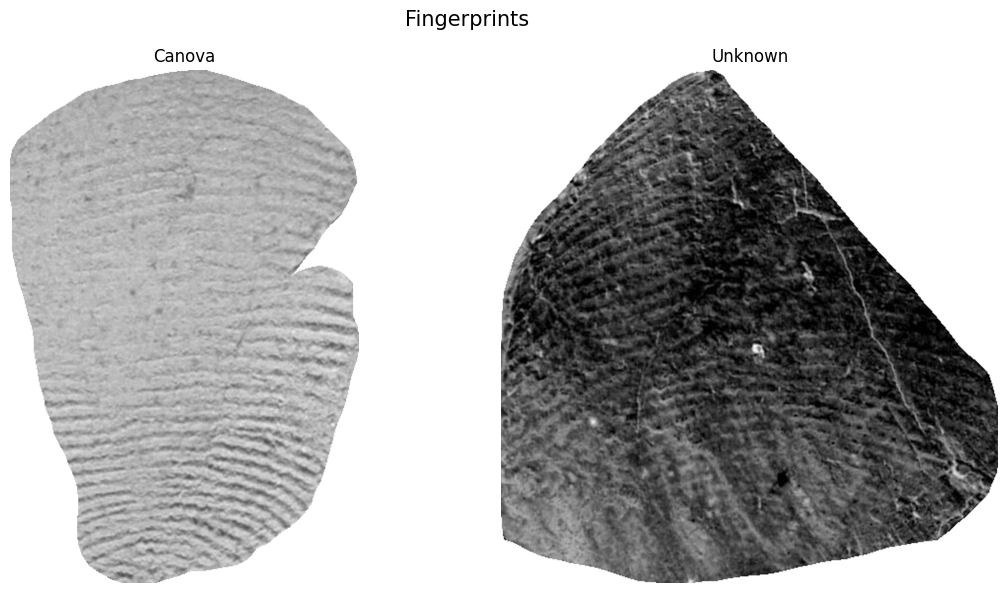

In [3]:
# plot 
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Fingerprints', fontsize = 15)

for ax, im, tit in zip(axs.flat, img_dict['raw_rgb'], ['Canova', 'Unknown']):
    ax.imshow(im)
    ax.set_title(tit)
    ax.axis('off')

fig.tight_layout()
plt.savefig(fig_path + 'fingerprints.jpg')

In [4]:
temp = img_dict['raw_rgb'][0]

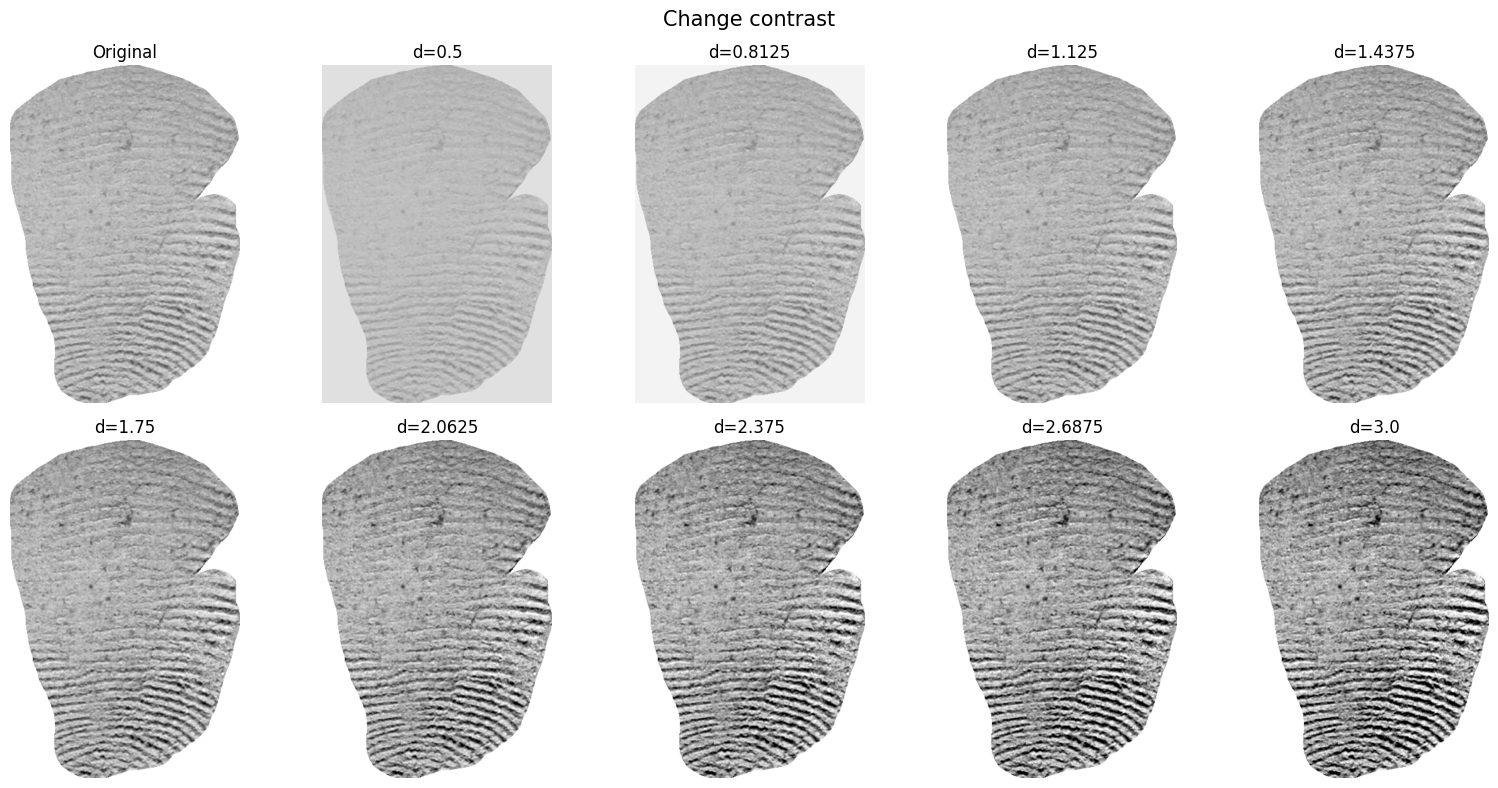

In [5]:
# change contrast
fig = plt.figure(figsize = (16, 8))
fig.suptitle('Change contrast', fontsize = 15)

deltas = np.linspace(0.5, 3, 9)
deltas = np.insert(deltas, 0, 1)
for i, d in enumerate(deltas):
    
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(tf.image.adjust_contrast(temp, d))
    ax.axis('off')
    tit = 'Original' if d==1 else f'd={d}'
    ax.set_title(tit)

fig.tight_layout()
plt.savefig(fig_path + 'canova_contrast.jpg')

In [6]:
temp = tf.image.adjust_contrast(temp, 2)

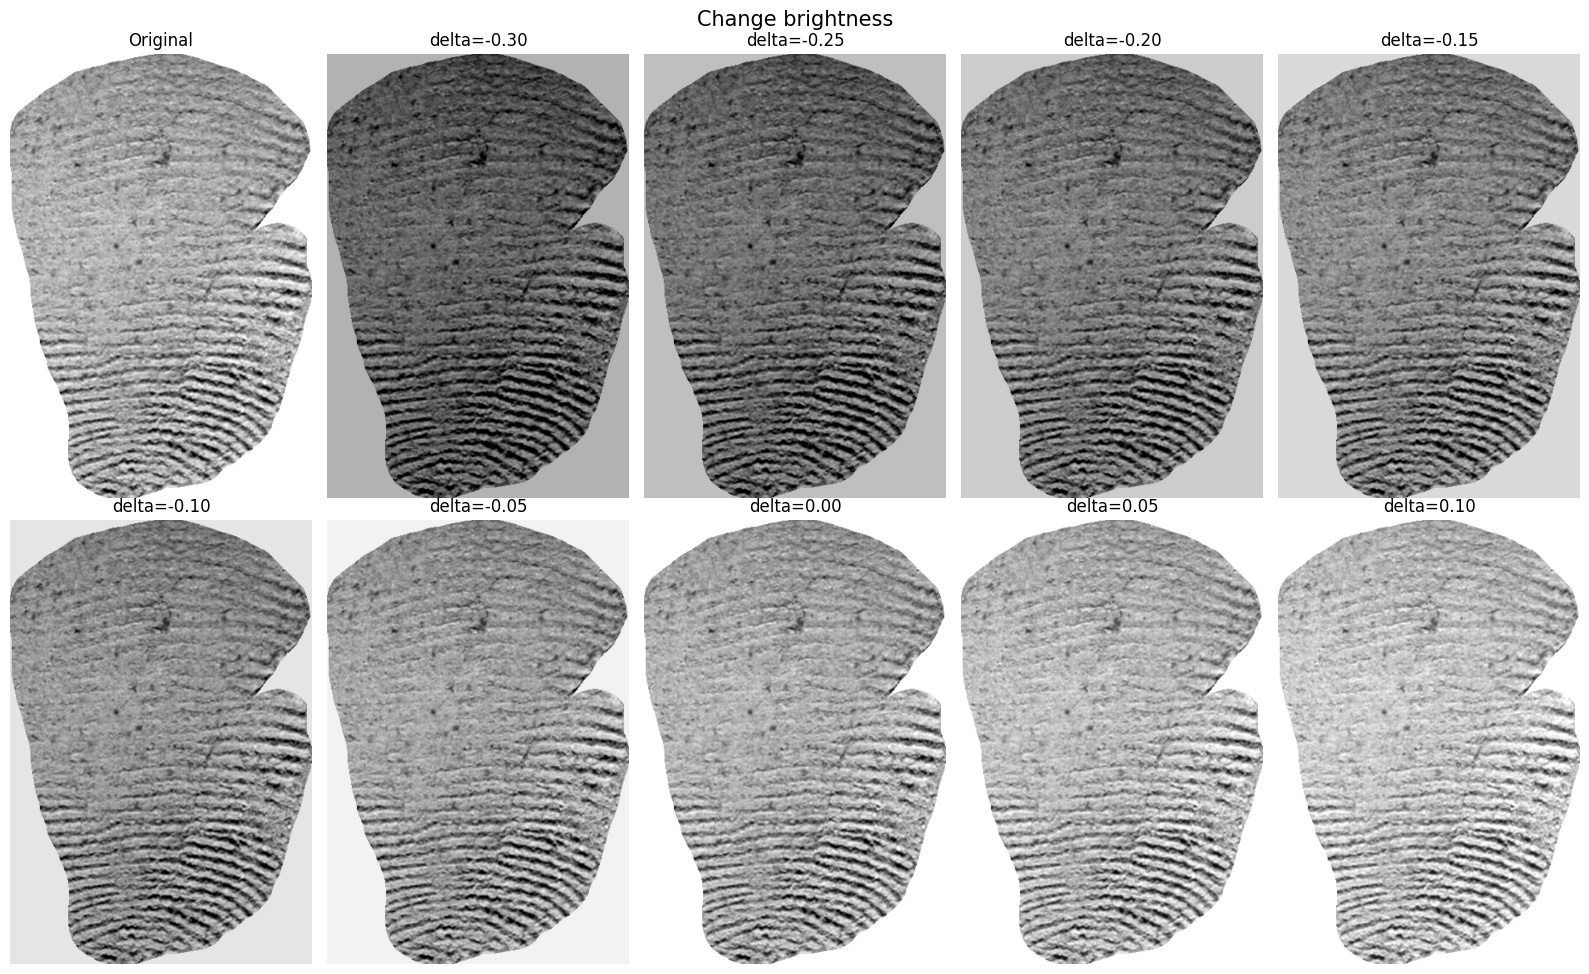

In [7]:
# change brightness
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Change brightness', fontsize = 15)

deltas = np.linspace(-0.3, 0.1, 9)
deltas = np.insert(deltas, 0, 0)
for i, d in enumerate(deltas):
    
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(tf.image.adjust_brightness(temp, d))
    ax.axis('off')
    tit = 'Original' if d==0 else f'delta={d:.2f}'
    ax.set_title(tit)

fig.tight_layout()
plt.savefig(fig_path + 'canova_brightness.jpg')

In [8]:
temp = tf.image.adjust_brightness(temp, -0.1)

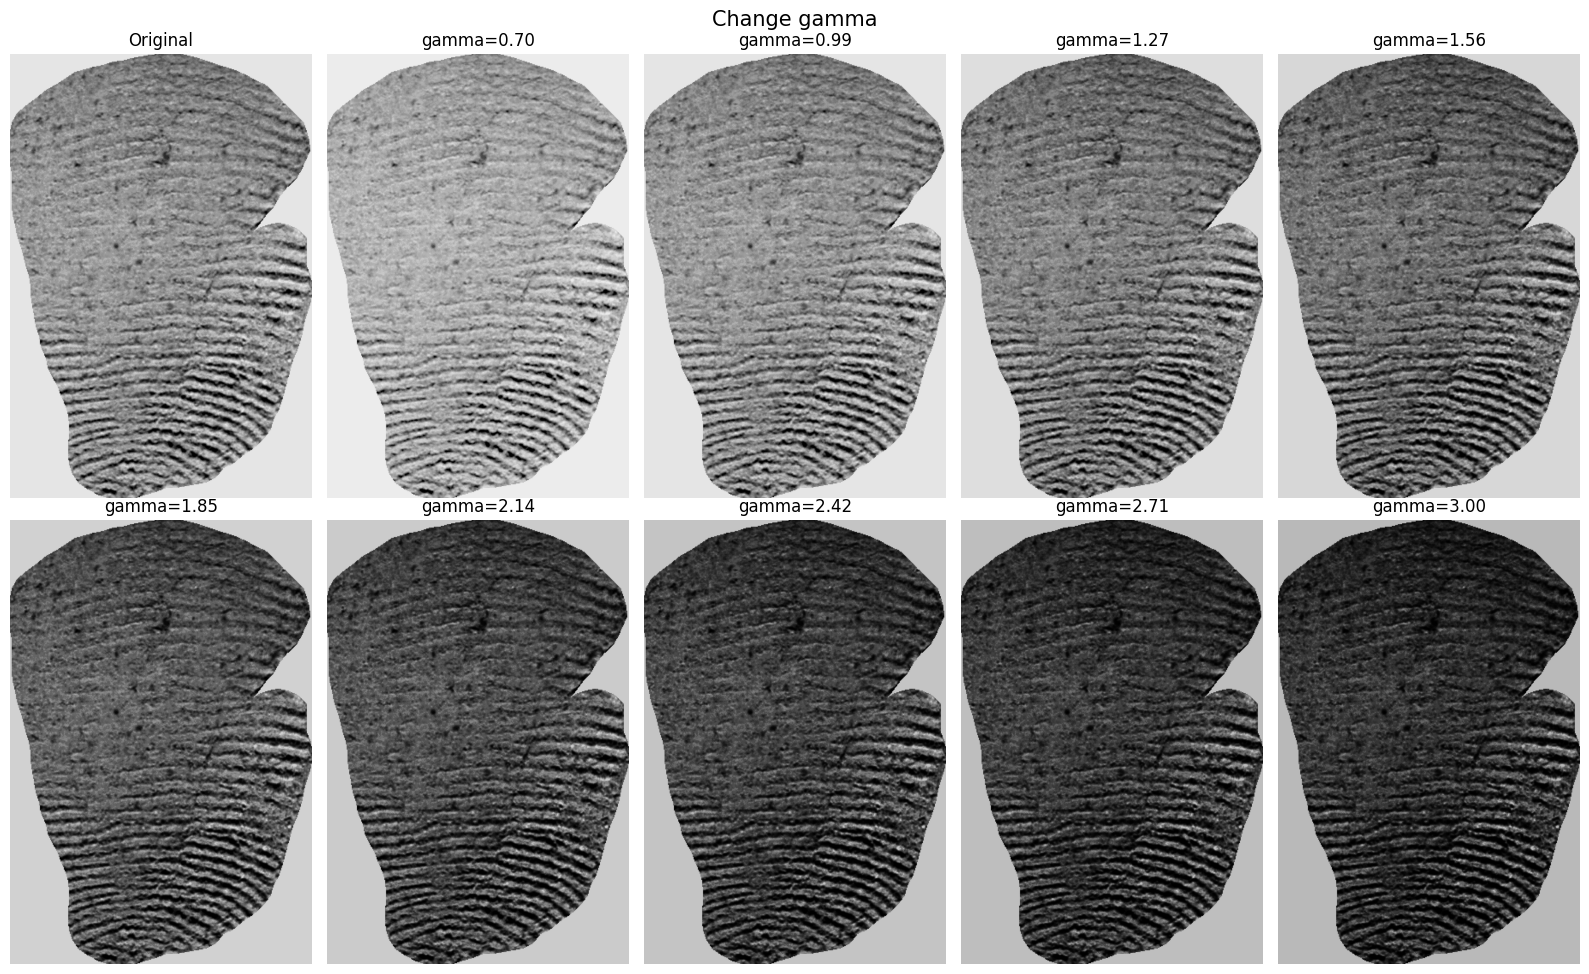

In [9]:
# change gamma
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Change gamma', fontsize = 15)

deltas = np.linspace(0.7, 3, 9)
deltas = np.insert(deltas, 0, 1)
for i, d in enumerate(deltas):
    
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(tf.image.adjust_gamma(temp, gamma=d))
    ax.axis('off')
    tit = 'Original' if d==1 else f'gamma={d:.2f}'
    ax.set_title(tit)

fig.tight_layout()
plt.savefig(fig_path + 'canova_saturation.jpg')

In [10]:
t1 = tf.image.adjust_gamma(temp, 1.5)

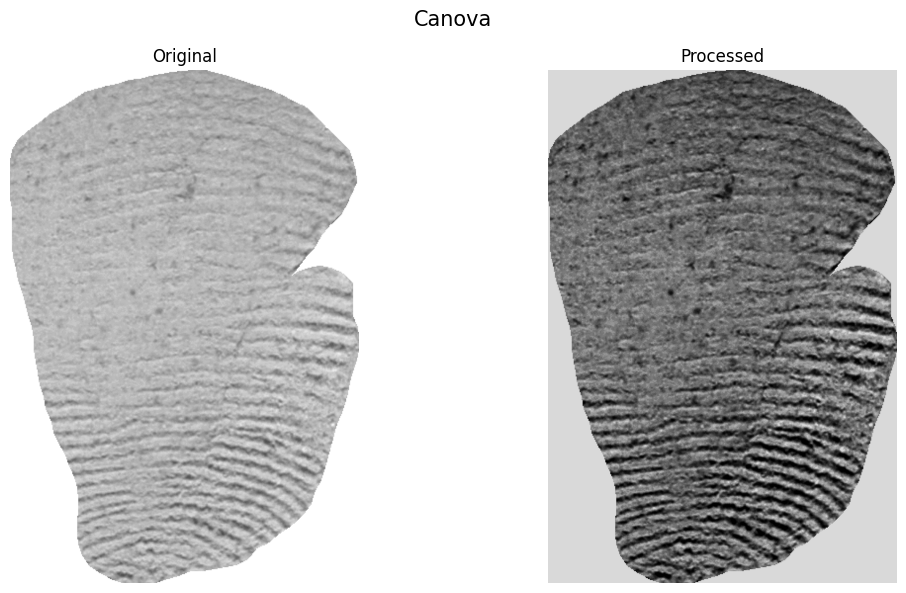

In [11]:
# plot 
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Canova', fontsize = 15)

for ax, im, tit in zip(axs.flat, [img_dict['raw_rgb'][0], t1], ['Original', 'Processed']):
    ax.imshow(im)
    ax.set_title(tit)
    ax.axis('off')

fig.tight_layout()
plt.savefig(fig_path + 'canova_comparison.jpg')

In [12]:
temp = img_dict['raw_rgb'][1]

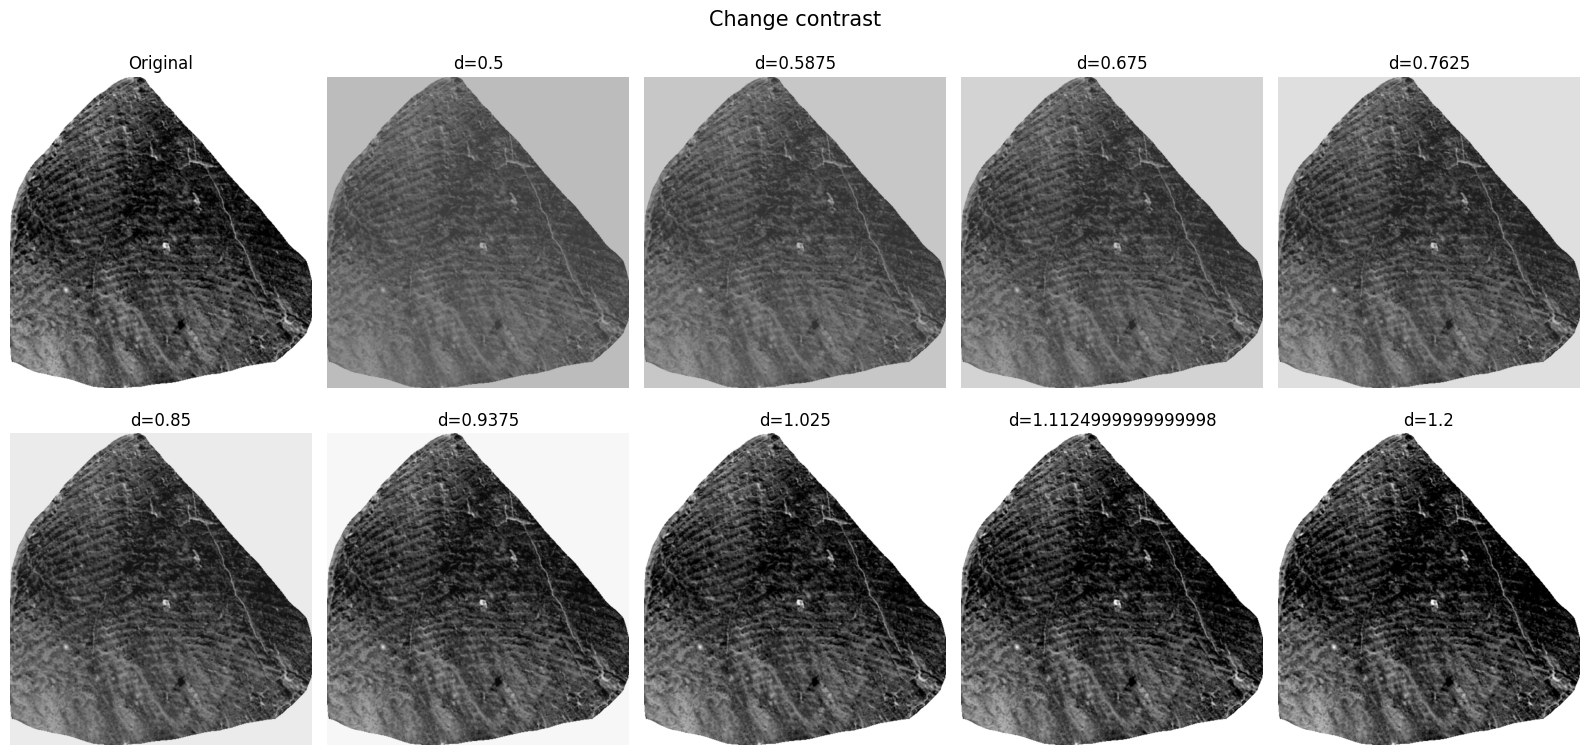

In [13]:
# change contrast
fig = plt.figure(figsize = (16, 8))
fig.suptitle('Change contrast', fontsize = 15)

deltas = np.linspace(0.5, 1.2, 9)
deltas = np.insert(deltas, 0, 1)
for i, d in enumerate(deltas):
    
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(tf.image.adjust_contrast(temp, d))
    ax.axis('off')
    tit = 'Original' if d==1 else f'd={d}'
    ax.set_title(tit)

fig.tight_layout()
plt.savefig(fig_path + 'unknown_contrast.jpg')

In [14]:
temp = tf.image.adjust_contrast(temp, 0.8)

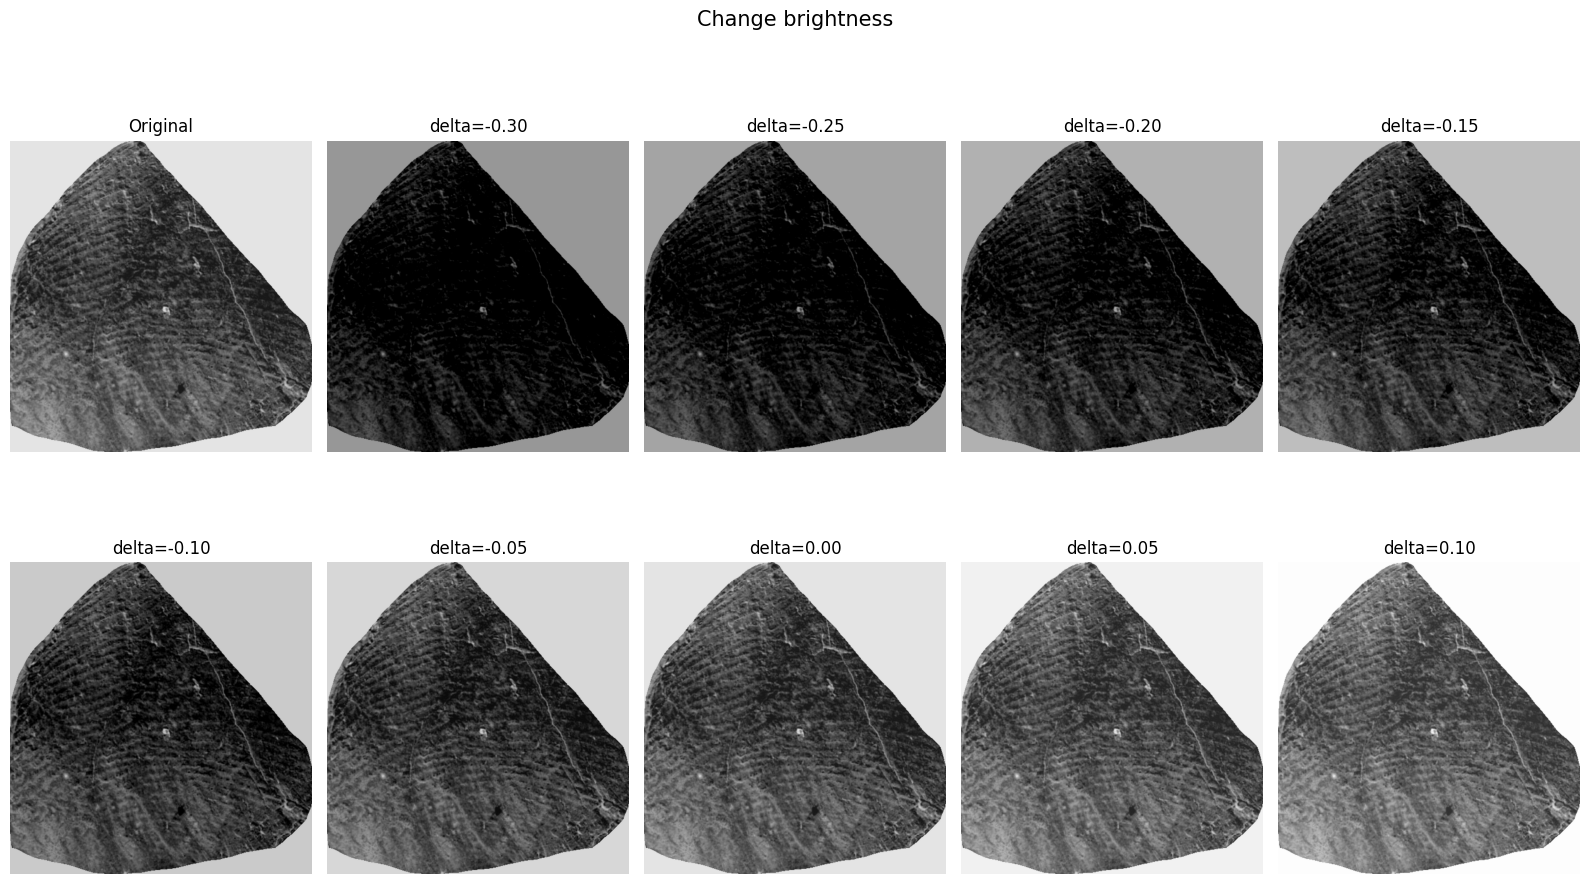

In [15]:
# change brightness
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Change brightness', fontsize = 15)

deltas = np.linspace(-0.3, 0.1, 9)
deltas = np.insert(deltas, 0, 0)
for i, d in enumerate(deltas):
    
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(tf.image.adjust_brightness(temp, d))
    ax.axis('off')
    tit = 'Original' if d==0 else f'delta={d:.2f}'
    ax.set_title(tit)

fig.tight_layout()
plt.savefig(fig_path + 'canova_brightness.jpg')

In [16]:
temp = tf.image.adjust_brightness(temp, -0.1)

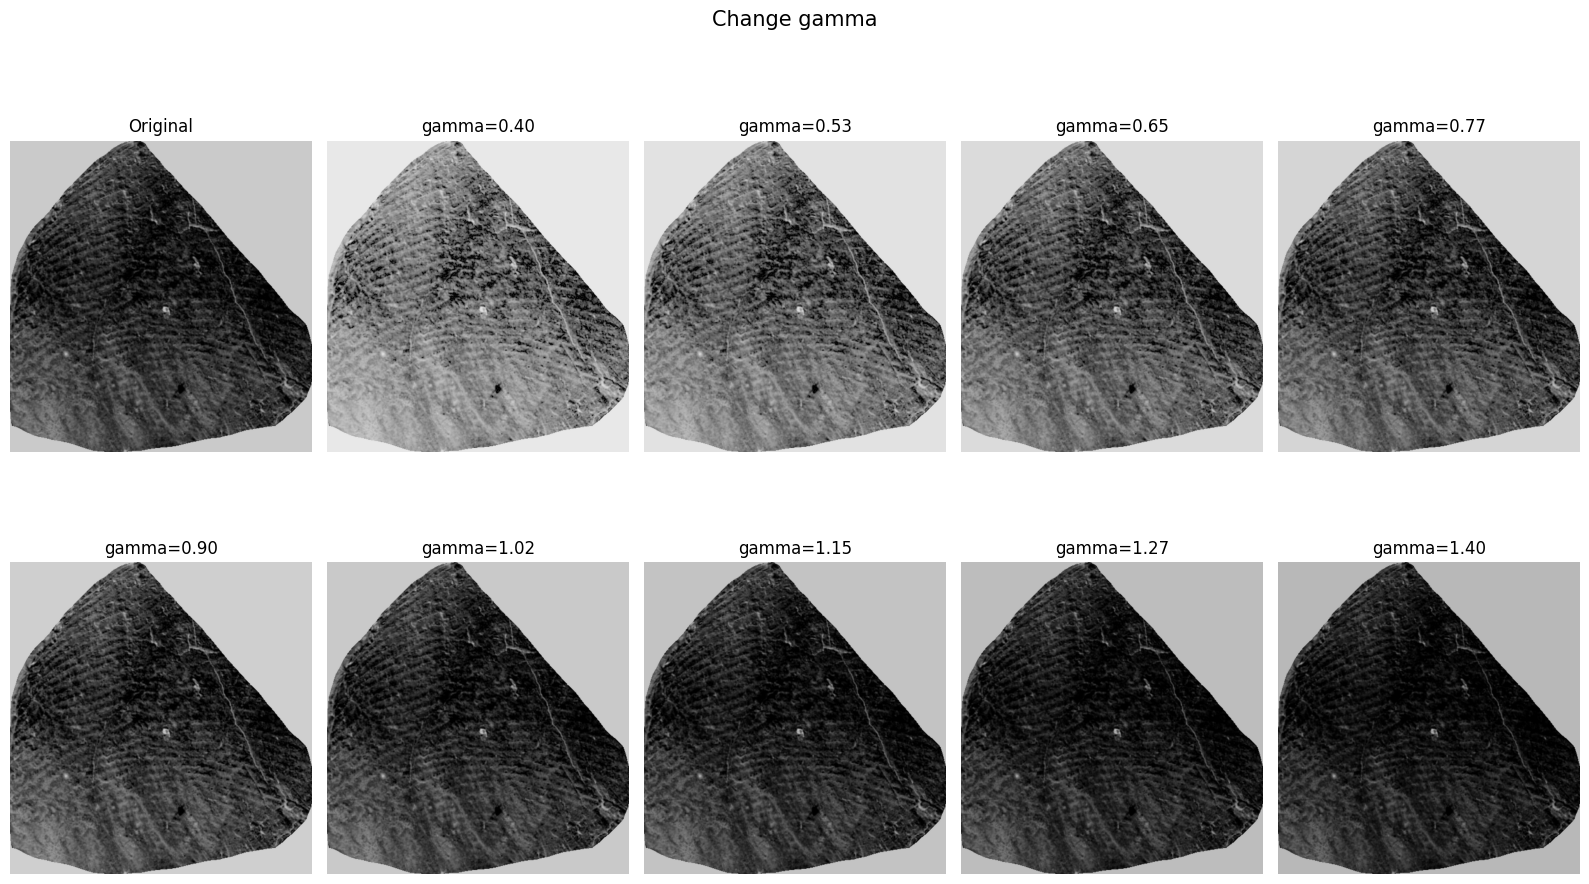

In [17]:
# change gamma
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Change gamma', fontsize = 15)

deltas = np.linspace(0.4, 1.4, 9)
deltas = np.insert(deltas, 0, 1)
for i, d in enumerate(deltas):
    
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(tf.image.adjust_gamma(temp, gamma=d))
    ax.axis('off')
    tit = 'Original' if d==1 else f'gamma={d:.2f}'
    ax.set_title(tit)

fig.tight_layout()
plt.savefig(fig_path + 'canova_saturation.jpg')

In [18]:
t2 = tf.image.adjust_gamma(temp, 0.8)

img_dict['processed'] = [Image.fromarray(t1.numpy()), Image.fromarray(t2.numpy())]

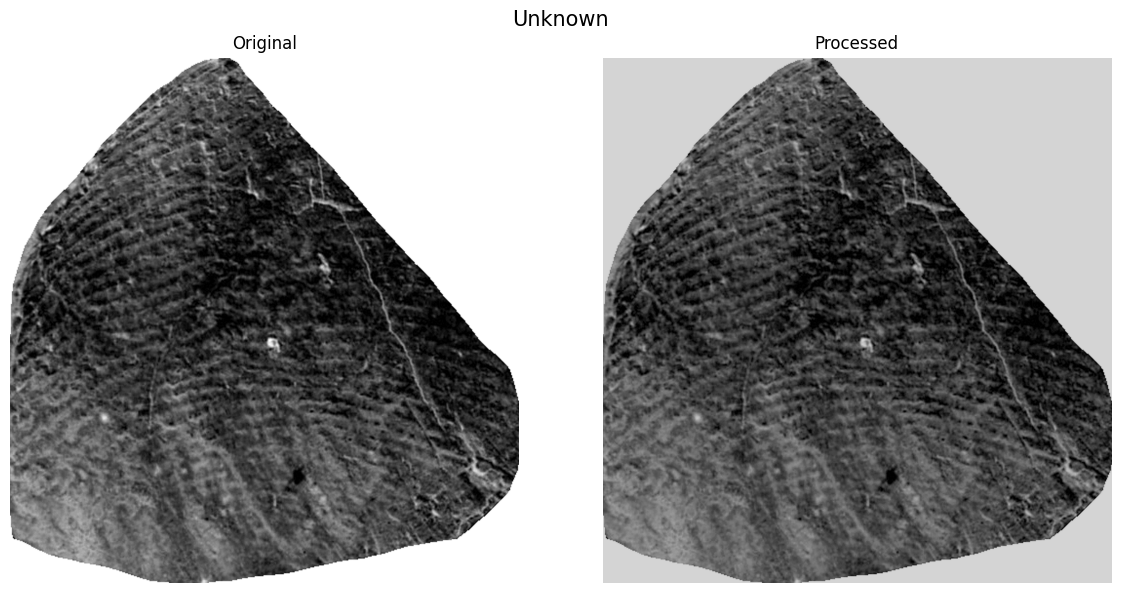

In [19]:
# plot 
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Unknown', fontsize = 15)

for ax, im, tit in zip(axs.flat, [img_dict['raw_rgb'][1], t2], ['Original', 'Processed']):
    ax.imshow(im)
    ax.set_title(tit)
    ax.axis('off')

fig.tight_layout()
plt.savefig(fig_path + 'canova_comparison.jpg')

In [20]:
t11 = Image.fromarray(fingerprint_enhancer.enhance_Fingerprint(t1.numpy()))
t22 = Image.fromarray(fingerprint_enhancer.enhance_Fingerprint(t2.numpy()))

img_dict['enhanced_gs'] = [t11, t22]

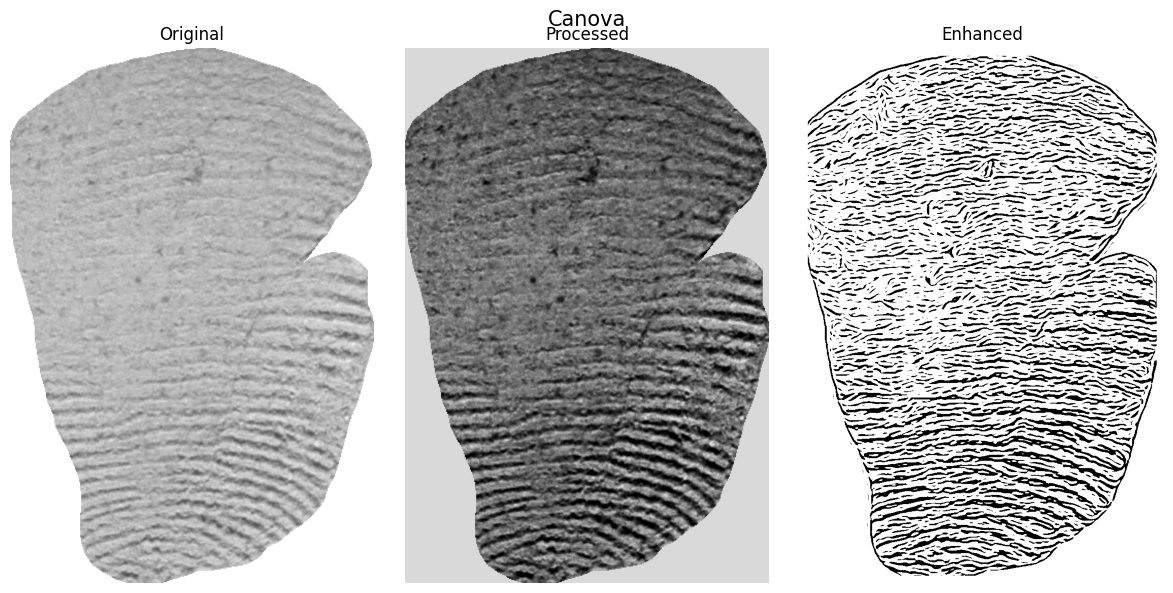

In [21]:
# plot 
fig, axs = plt.subplots(1, 3, figsize = (12, 6))
fig.suptitle('Canova', fontsize = 15)

for ax, im, tit in zip(axs.flat, [img_dict['raw_rgb'][0], t1, t11], ['Original', 'Processed', 'Enhanced']):
    ax.imshow(im, cmap='Greys')
    ax.set_title(tit)
    ax.axis('off')

fig.tight_layout()
plt.savefig(fig_path + 'canova_comparison2.jpg')

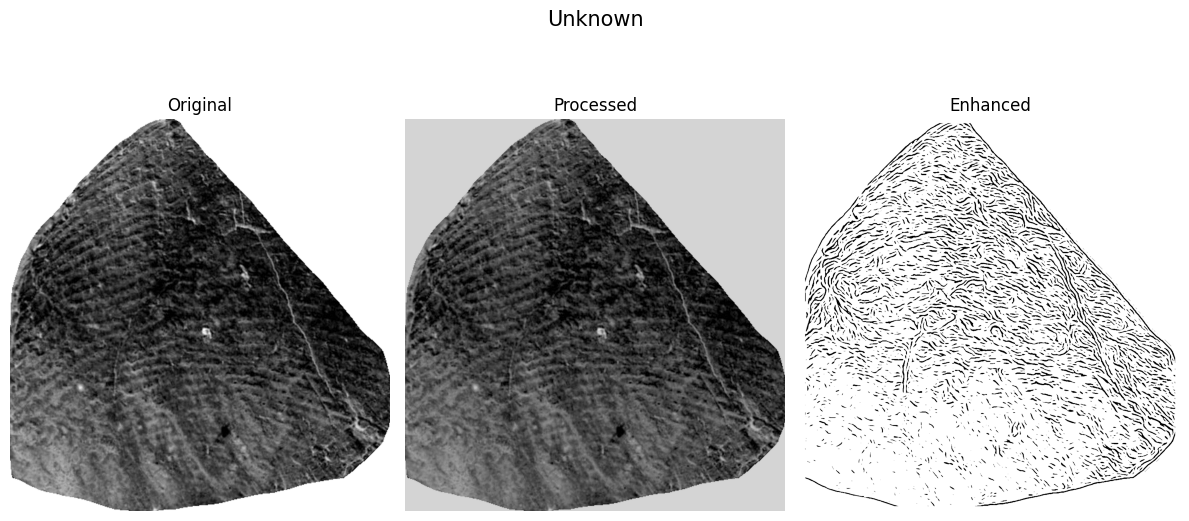

In [22]:
# plot 
fig, axs = plt.subplots(1, 3, figsize = (12, 6))
fig.suptitle('Unknown', fontsize = 15)

for ax, im, tit in zip(axs.flat, [img_dict['raw_rgb'][1], t2, t22], ['Original', 'Processed', 'Enhanced']):
    ax.imshow(im, cmap='Greys')
    ax.set_title(tit)
    ax.axis('off')

fig.tight_layout()
plt.savefig(fig_path + 'unknown_comparison2.jpg')

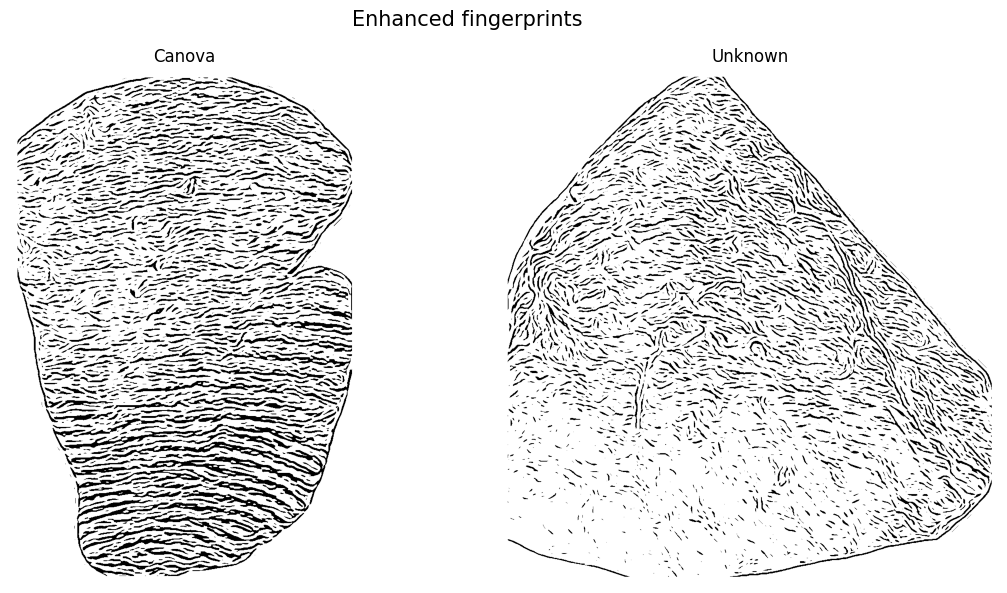

In [23]:
# plot 
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Enhanced fingerprints', fontsize = 15)

for ax, im, tit in zip(axs.flat, img_dict['enhanced_gs'], ['Canova', 'Unknown']):
    ax.imshow(im, cmap='Greys')
    ax.set_title(tit)
    ax.axis('off')

fig.tight_layout()
plt.savefig(fig_path + 'comparison.jpg')

In [24]:
enhanced_img_path = '../data/cropped/enhanced/'
processed_img_path = '../data/cropped/processed/' 

os.makedirs(processed_img_path, exist_ok=True) 
os.makedirs(enhanced_img_path, exist_ok=True)

(img_dict['enhanced_gs'][0]).save(enhanced_img_path + 'mc.bmp', dpi = (500, 500))
(img_dict['enhanced_gs'][1]).save(enhanced_img_path + 'sg.bmp', dpi = (500, 500))
(img_dict['processed'][0]).save(processed_img_path + 'mc.bmp', dpi = (500, 500))
(img_dict['processed'][1]).save(processed_img_path + 'sg.bmp', dpi = (500, 500))